In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
from numpy import std
from numpy import sqrt

In [5]:
#DataFrames
df1 = pd.read_csv("./train/data_01.csv")
df2 = pd.read_csv("./train/data_02.csv")
df3 = pd.read_csv("./train/data_03.csv")
df4 = pd.read_csv("./train/data_04.csv")
df5 = pd.read_csv("./train/data_05.csv")
df6 = pd.read_csv("./train/data_06.csv")
df7 = pd.read_csv("./train/data_07.csv")
df8 = pd.read_csv("./train/data_08.csv")
df9 = pd.read_csv("./train/data_09.csv")
df10 = pd.read_csv("./train/data_010.csv")
df11 = pd.read_csv("./train/data_011.csv")
df12 = pd.read_csv("./train/data_012.csv")
df13 = pd.read_csv("./train/data_013.csv")
df14 = pd.read_csv("./train/data_014.csv")
df15 = pd.read_csv("./train/data_015.csv")

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# DataFrameap = DataFrame.append(frames)
DataFrame = pd.concat(frames)


# DataFrame.fillna(0, inplace = True)
# cols = ['date','T_AMB','P_AMB','CMP_SPEED','CDP','GGDP','HPT_IT','CDT','LPT_IT','EXH_T','RH','WAR','POWER']
cols = DataFrame.columns
df = DataFrame.groupby('date')[cols].mean()

#This is the Train Dataset
df.head()
# df.head()

,T_AMB,P_AMB,CMP_SPEED,CDP,GGDP,HPT_IT,CDT,LPT_IT,EXH_T,RH,WAR,POWER
date,,,,,,,,,,,,
2021-01-01,14.525423,0.978308,2232.040293,2.834110,1.460890,1126.382309,100.028722,805.744938,558.950401,71.022103,0.000082,11478.130430
2021-01-02,15.620973,0.978286,3020.000103,3.476021,1.618626,1116.427074,129.490105,797.480682,552.417554,67.279691,0.000082,11271.476123
2021-01-03,21.545433,0.978238,3928.570879,4.238690,1.808123,1134.291394,169.804536,808.456590,558.829066,49.283438,0.000083,11804.477789
2021-01-04,26.237703,0.978513,4433.722667,4.816614,1.929452,1129.342278,190.022795,797.905914,545.589356,37.939369,0.000082,12482.753716
2021-01-05,25.121452,0.978372,5207.878442,5.619231,2.113679,1104.809523,214.536453,770.044473,517.161705,40.261212,0.000082,13224.386448


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2021-01-01 to 2022-01-01
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   T_AMB      366 non-null    float64
 1   P_AMB      366 non-null    float64
 2   CMP_SPEED  366 non-null    float64
 3   CDP        366 non-null    float64
 4   GGDP       366 non-null    float64
 5   HPT_IT     366 non-null    float64
 6   CDT        366 non-null    float64
 7   LPT_IT     366 non-null    float64
 8   EXH_T      366 non-null    float64
 9   RH         366 non-null    float64
 10  WAR        366 non-null    float64
 11  POWER      366 non-null    float64
dtypes: float64(12)
memory usage: 37.2+ KB


In [7]:
#Looking for duplicated values
DFDuplicated = df.duplicated().sum()
print("Number of duplicated values: ", DFDuplicated)

#Looking for missing values 
DFMissing = df.isnull().sum()
print("\nNumber of missing values: ")
print(DFMissing)

Number of duplicated values:  0

Number of missing values: 
T_AMB        0
P_AMB        0
CMP_SPEED    0
CDP          0
GGDP         0
HPT_IT       0
CDT          0
LPT_IT       0
EXH_T        0
RH           0
WAR          0
POWER        0
dtype: int64


In [8]:
#Analyzing the power data stats in train dataset
df['POWER'].describe()

count      366.000000
mean     11755.517840
std        765.556621
min       9416.798321
25%      11211.046397
50%      11776.048978
75%      12332.571076
max      13645.445741
Name: POWER, dtype: float64

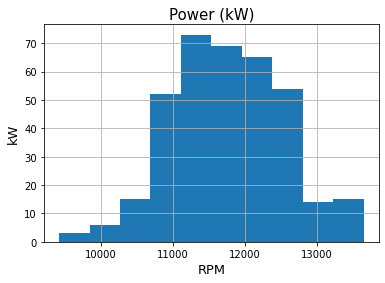

In [9]:
#Histogram
df.hist('POWER')
plt.title("Power (kW)", fontsize=15)
plt.xlabel("RPM",fontsize=13)
plt.ylabel("kW",fontsize=13)
plt.show()

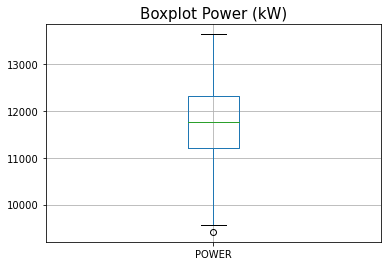

In [10]:
df.boxplot('POWER')
plt.title('Boxplot Power (kW)', fontsize = 15)
plt.show()

In [11]:
df.isnull().sum()

T_AMB        0
P_AMB        0
CMP_SPEED    0
CDP          0
GGDP         0
HPT_IT       0
CDT          0
LPT_IT       0
EXH_T        0
RH           0
WAR          0
POWER        0
dtype: int64

In [12]:
col_names = ["T_AMB","P_AMB","CMP_SPEED","CDP","GGDP","HPT_IT","CDT","LPT_IT","EXH_T","RH","WAR","POWER"]   
feat_names = col_names[:-1]

In [13]:
std_sclr = StandardScaler()
df_ss = df.copy()
df_ss[feat_names] = std_sclr.fit_transform(df_ss[feat_names])
df_ss.head()

,T_AMB,P_AMB,CMP_SPEED,CDP,GGDP,HPT_IT,CDT,LPT_IT,EXH_T,RH,WAR,POWER
date,,,,,,,,,,,,
2021-01-01,-1.331041,-0.343432,-4.732348,-4.504434,-4.619612,-1.212738,-4.738649,-1.167417,-1.145993,1.429782,-1.801989,11478.130430
2021-01-02,-1.081715,-0.640857,-3.841513,-3.661679,-3.775176,-1.432395,-3.890359,-1.346200,-1.289084,1.126408,-1.493438,11271.476123
2021-01-03,0.266578,-1.285428,-2.814320,-2.660384,-2.760714,-1.038228,-2.729573,-1.108755,-1.148651,-0.332438,0.390889,11804.477789
2021-01-04,1.334449,2.391538,-2.243217,-1.901637,-2.111185,-1.147428,-2.147422,-1.337001,-1.438643,-1.252032,-1.659824,12482.753716
2021-01-05,1.080412,0.513515,-1.367988,-0.847895,-1.124937,-1.688731,-1.441593,-1.939734,-2.061299,-1.063815,-1.005906,13224.386448


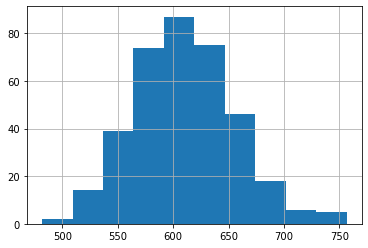

In [14]:
#Histogram of thw most important feature 'EXH_T'
df.hist('EXH_T')
plt.title("", fontsize=15)
plt.xlabel("",fontsize=13)
plt.ylabel("",fontsize=13)
plt.show()

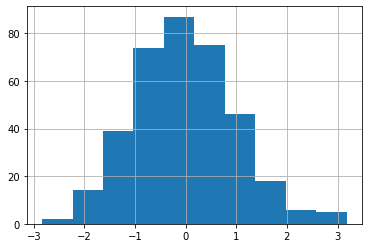

In [15]:
#Standarization of the most important feature 'EXH_T'
df_ss.hist('EXH_T')
plt.title("", fontsize=15)
plt.xlabel("",fontsize=13)
plt.ylabel("",fontsize=13)
plt.show()

In [16]:
#Using standarized data
feature_selector = SelectKBest(score_func=f_regression, k='all')
feature_selector.fit(df_ss[feat_names], df_ss["POWER"])

SelectKBest(k='all', score_func=<function f_regression at 0x00000236B4E0A1F0>)

In [17]:
feat_scores = sorted(feature_selector.scores_, reverse=True)

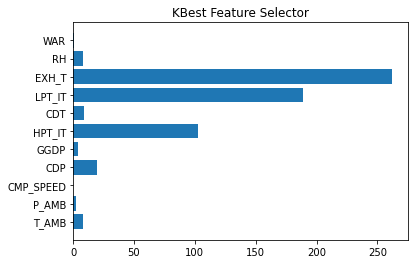

In [18]:
plt.barh([df_ss.columns[i] for i in range(len(feature_selector.scores_))], feature_selector.scores_)
plt.title("KBest Feature Selector")
plt.ylim(-1,11)
plt.show()

In [19]:
print(cols)

Index(['date', 'T_AMB', 'P_AMB', 'CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT',
       'LPT_IT', 'EXH_T', 'RH', 'WAR', 'POWER'],
      dtype='object')


In [20]:
high_corr_ =  ['EXH_T', 'LPT_IT', 'HPT_IT', 'CDP']
y = ['POWER']

In [21]:
# sns_plot = sns.pairplot(df[high_corr_+y], size=2)

# Linear Regression Model

### Correlation Features #1

In [22]:
#By this analysis and trying to avoid collinearity, we must drop LPT_IT
high_corr1 =  ['EXH_T', 'HPT_IT', 'CDP']

In [23]:
#Creating the model with Standarization of numerical values (All the rows and columns)
# x = df_ss[high_corr1]
# y = df_ss['POWER']

x = df[high_corr1]
y = df['POWER']

y.head()

date
2021-01-01    11478.130430
2021-01-02    11271.476123
2021-01-03    11804.477789
2021-01-04    12482.753716
2021-01-05    13224.386448
Name: POWER, dtype: float64

In [24]:
x.head()

,EXH_T,HPT_IT,CDP
date,,,
2021-01-01,558.950401,1126.382309,2.834110
2021-01-02,552.417554,1116.427074,3.476021
2021-01-03,558.829066,1134.291394,4.238690
2021-01-04,545.589356,1129.342278,4.816614
2021-01-05,517.161705,1104.809523,5.619231


In [25]:
#Test-Train Split
data_all = x
target_all = y

data_train, data_test, target_train, target_test = train_test_split(data_all, target_all, test_size = .2, random_state=42)

print("Train:", data_train.shape, target_train.shape)
print("Test: ", data_test.shape, target_test.shape)


Train: (292, 3) (292,)
Test:  (74, 3) (74,)


In [26]:
lin_model = LinearRegression()

In [27]:
#Training the data with Training dataset
lin_model.fit(data_train, target_train)

LinearRegression()

In [28]:
#Making a prediction using training data
target_train_predict = lin_model.predict(data_train)

#Exploring the prediction results
df_train_model = pd.DataFrame()
df_train_model["actual"] = target_train
df_train_model["predicted"] = target_train_predict
df_train_model.head()

,actual,predicted
date,,
2021-12-08,11396.236652,11298.699707
2021-07-22,12175.822312,12656.006114
2021-03-17,10930.927370,11377.357124
2021-03-26,11462.555216,11422.952411
2021-12-21,10015.578233,9802.420416


In [29]:
#Prediction using test data set (Which comes from the test split of the training dataset)
target_test_predict = lin_model.predict(data_test)


#Exploring the prediction results
df_test_model = pd.DataFrame()
df_test_model["actual"] = target_test
df_test_model["predicted"] = target_test_predict
df_test_model.head()

,actual,predicted
date,,
2021-07-13,12523.452766,11936.432169
2021-02-03,11356.766009,11720.637086
2021-01-16,11788.773072,12356.843495
2021-11-07,12475.579158,11945.082812
2021-02-27,11161.354163,11843.819308


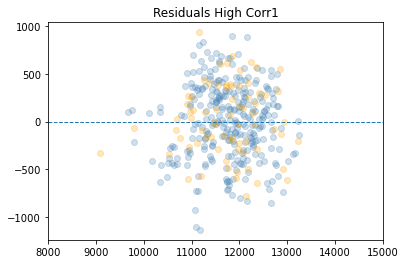

In [30]:
#Este grafico permite detectar outliers haciendo una relacion entre 
#la dispersion del target train y para el target test, 
plt.scatter(target_train_predict, target_train_predict - target_train, c="steelblue", alpha=0.25)
plt.scatter(target_test_predict, target_test_predict - target_test, c="orange", alpha=0.25)
plt.hlines(0, 8000, 15000, linestyle="--", linewidth=1)
plt.xlim(8000, 15000)
plt.title("Residuals High Corr1")
plt.show()

In [31]:
#Error
rmse_train = (np.sqrt(mean_squared_error(target_train, target_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(target_test, target_test_predict)))

print("RMSE for taining data: {:.4f}".format(rmse_train))
print("RMSE for testing data: {:.4f}".format(rmse_test))

RMSE for taining data: 384.0095
RMSE for testing data: 370.0893


In [32]:
#Running the model with the real testing data...

file = "./train/data_01.csv"
df_test = pd.read_csv(file) 

# Set index as date so we don't have to deal with it
df_test = df_test.set_index('date')

# Handling missing values of df_test
df_test.fillna(0, inplace = True)

# Predictions using the test set
df_test = df_test[high_corr1]

y_pred = lin_model.predict(df_test)

y_pred = pd.DataFrame(y_pred)

y_pred.head()

,0
0,-3661.656636
1,13535.298147
2,13723.453474
3,13809.551712
4,13755.311957


- With the High Correlation 1 features, and using the RMSE we get the error showed above


### Correlation Features #2

###### Remember that we are working with Standarized Training data

In [33]:
high_corr2 =  ['CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT', 'LPT_IT', 'EXH_T']

In [34]:
#Creating the model with Standarization of numerical values (All the rows and columns)
# x = df_ss[high_corr2]
# y = df_ss['POWER']

x = df[high_corr2]
y = df['POWER']
y.head()

date
2021-01-01    11478.130430
2021-01-02    11271.476123
2021-01-03    11804.477789
2021-01-04    12482.753716
2021-01-05    13224.386448
Name: POWER, dtype: float64

In [35]:
x.head()

,CMP_SPEED,CDP,GGDP,HPT_IT,CDT,LPT_IT,EXH_T
date,,,,,,,
2021-01-01,2232.040293,2.834110,1.460890,1126.382309,100.028722,805.744938,558.950401
2021-01-02,3020.000103,3.476021,1.618626,1116.427074,129.490105,797.480682,552.417554
2021-01-03,3928.570879,4.238690,1.808123,1134.291394,169.804536,808.456590,558.829066
2021-01-04,4433.722667,4.816614,1.929452,1129.342278,190.022795,797.905914,545.589356
2021-01-05,5207.878442,5.619231,2.113679,1104.809523,214.536453,770.044473,517.161705


In [36]:
#Test-Train Split
data_all = x
target_all = y

data_train, data_test, target_train, target_test = train_test_split(data_all, target_all, test_size = .2, random_state=42)

print("Train:", data_train.shape, target_train.shape)
print("Test: ", data_test.shape, target_test.shape)


Train: (292, 7) (292,)
Test:  (74, 7) (74,)


In [37]:
lin_model = LinearRegression()

In [38]:
#Training the data with Training dataset
lin_model.fit(data_train, target_train)

LinearRegression()

In [39]:
#Making a prediction using training data
target_train_predict = lin_model.predict(data_train)

#Exploring the prediction results
df_train_model = pd.DataFrame()
df_train_model["actual"] = target_train
df_train_model["predicted"] = target_train_predict
df_train_model.head()

,actual,predicted
date,,
2021-12-08,11396.236652,11553.177740
2021-07-22,12175.822312,12436.813314
2021-03-17,10930.927370,10920.830076
2021-03-26,11462.555216,11575.089826
2021-12-21,10015.578233,9829.332350


In [40]:
#Prediction using test data set (Which comes from the test split of the training dataset)
target_test_predict = lin_model.predict(data_test)


#Exploring the prediction results
df_test_model = pd.DataFrame()
df_test_model["actual"] = target_test
df_test_model["predicted"] = target_test_predict
df_test_model.head()

,actual,predicted
date,,
2021-07-13,12523.452766,12437.954071
2021-02-03,11356.766009,11412.853738
2021-01-16,11788.773072,11935.854837
2021-11-07,12475.579158,12564.865680
2021-02-27,11161.354163,11169.017012


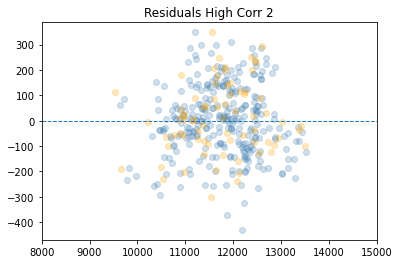

In [41]:
#Este grafico permite detectar outliers haciendo una relacion entre 
#la dispersion del target train y para el target test, 
plt.scatter(target_train_predict, target_train_predict - target_train, c="steelblue", alpha=0.25)
plt.scatter(target_test_predict, target_test_predict - target_test, c="orange", alpha=0.25)
plt.hlines(0, 8000, 15000, linestyle="--", linewidth=1)
plt.xlim(8000, 15000)
plt.title("Residuals High Corr 2")
plt.show()

In [42]:
#Error
rmse_train = (np.sqrt(mean_squared_error(target_train, target_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(target_test, target_test_predict)))

print("RMSE for taining data: {:.4f}".format(rmse_train))
print("RMSE for testing data: {:.4f}".format(rmse_test))

RMSE for taining data: 137.6784
RMSE for testing data: 138.4634


In [43]:
#Running the model with the real testing data...

file = "./train/data_01.csv"
df_test = pd.read_csv(file) 

# Set index as date so we don't have to deal with it
df_test = df_test.set_index('date')

# Handling missing values of df_test
df_test.fillna(0, inplace = True)

# Predictions using the test set
df_test = df_test[high_corr2]

y_pred = lin_model.predict(df_test)

y_pred = pd.DataFrame(y_pred)

y_pred.head()

,0
0,-15568.684021
1,12488.336008
2,12306.747886
3,12024.145562
4,12021.328925


- With the High Correlation 2 features, and using the RMSE we get the error showed above
- Nice to see that the model has become more effective with this features

### Correlation Features #3

For selecting this features we are going to just drop the columns that may have collinearity with the other variables.

To do so, we must get a correlation matrix, as follows... 

In [44]:
# correlation_matrix = df_ss.corr()
# correlation_labels = correlation_matrix.columns
# plt.figure(figsize=(18,10))

# # Heatmap
# corr_im = plt.imshow(correlation_matrix, cmap="RdBu", vmin=-1, vmax=1)
# corr_cbar = plt.colorbar(corr_im, ticks=[-1, -0.5, 0, 0.5, 1])
# corr_cbar.outline.set_visible(False)

# corr_array = corr_im.get_array()
# for i in range(correlation_matrix.shape[0]):
#     for j in range(correlation_matrix.shape[1]):
#         cell_value = corr_array[i][j]
#         if cell_value > 0.5:
#             text_color = 'white'
#         else:
#             text_color = 'black'
#         plt.text(i, j, '{:.2f}'.format(cell_value), color=text_color, ha='center', va='center')

# plt.yticks(ticks=range(len(correlation_labels)), labels=correlation_labels)
# plt.xticks(ticks=range(len(correlation_labels)), labels=correlation_labels, rotation=90)

# ax = plt.gca()
# for direction in ('left', 'bottom', 'right', 'top'):
#     ax.spines[direction].set_visible(False)

# plt.title("Correlation Matrix")
# plt.show()

Looking at this correlation matrix, we can see that we must drop the next features: ['RH', 'GGDP', 'CDT', 'LPT_IT']

Edit: Just drop 'RH'

In [45]:
high_corr3 = ['T_AMB','P_AMB', 'CMP_SPEED', 'CDP','HPT_IT', 'EXH_T', 'WAR', 'GGDP', 'CDT', 'LPT_IT']

In [46]:
high_corr3

['T_AMB',
 'P_AMB',
 'CMP_SPEED',
 'CDP',
 'HPT_IT',
 'EXH_T',
 'WAR',
 'GGDP',
 'CDT',
 'LPT_IT']

In [47]:
#Creating the model with Standarization of numerical values (All the rows and columns)
# x = df_ss[high_corr3]
# y = df_ss['POWER']

x = df[high_corr3]
y = df['POWER']

In [48]:
#Test-Train Split
data_all = x
target_all = y

data_train, data_test, target_train, target_test = train_test_split(data_all, target_all, test_size = .2, random_state=42)

print("Train:", data_train.shape, target_train.shape)
print("Test: ", data_test.shape, target_test.shape)


Train: (292, 10) (292,)
Test:  (74, 10) (74,)


In [49]:
lin_model = LinearRegression()

In [50]:
#Training the data with Training dataset
lin_model.fit(data_train, target_train)

LinearRegression()

In [51]:
#Making a prediction using training data
target_train_predict = lin_model.predict(data_train)

#Exploring the prediction results
df_train_model = pd.DataFrame()
df_train_model["actual"] = target_train
df_train_model["predicted"] = target_train_predict
df_train_model.head()

,actual,predicted
date,,
2021-12-08,11396.236652,11470.460528
2021-07-22,12175.822312,12367.376952
2021-03-17,10930.927370,10997.589879
2021-03-26,11462.555216,11611.660422
2021-12-21,10015.578233,9949.799888


In [52]:
#Prediction using test data set (Which comes from the test split of the training dataset)
target_test_predict = lin_model.predict(data_test)


#Exploring the prediction results
df_test_model = pd.DataFrame()
df_test_model["actual"] = target_test
df_test_model["predicted"] = target_test_predict
df_test_model.head()

,actual,predicted
date,,
2021-07-13,12523.452766,12445.142755
2021-02-03,11356.766009,11411.924031
2021-01-16,11788.773072,11902.780896
2021-11-07,12475.579158,12428.919611
2021-02-27,11161.354163,11048.137429


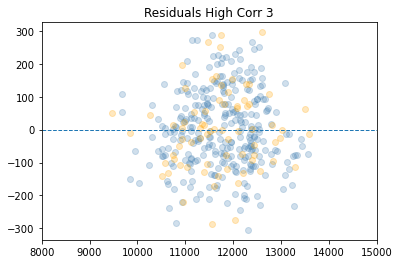

In [53]:
#Este grafico permite detectar outliers haciendo una relacion entre 
#la dispersion del target train y para el target test, 
plt.scatter(target_train_predict, target_train_predict - target_train, c="steelblue", alpha=0.25)
plt.scatter(target_test_predict, target_test_predict - target_test, c="orange", alpha=0.25)
plt.hlines(0, 8000, 15000, linestyle="--", linewidth=1)
plt.xlim(8000, 15000)
plt.title("Residuals High Corr 3")
plt.show()

In [54]:
#Error
rmse_train = (np.sqrt(mean_squared_error(target_train, target_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(target_test, target_test_predict)))

print("RMSE for taining data: {:.4f}".format(rmse_train))
print("RMSE for testing data: {:.4f}".format(rmse_test))

RMSE for taining data: 118.5400
RMSE for testing data: 120.6530


In [55]:
#Running the model with the real testing data...

file = "./train/data_01.csv"
df_test = pd.read_csv(file) 

# Set index as date so we don't have to deal with it
df_test = df_test.set_index('date')

# Handling missing values of df_test
df_test.fillna(0, inplace = True)

# Predictions using the test set
df_test = df_test[high_corr3]

y_pred = lin_model.predict(df_test)

y_pred = pd.DataFrame(y_pred)

y_pred.head()

,0
0,-40417.833967
1,-17747.081464
2,-18233.513717
3,-18385.794623
4,-18540.392882


Trying to get good result for exporting a csv


In [56]:
# # Let's add dates
# target_test['date'] = target_test_predict.index # take dates from original test set
# y_pred.columns =  ['POWER', 'date'] # rename cols names
# y_pred = y_pred[['date','POWER']] # rearrange cols
# # y_pred['date'] = pd.to_datetime(df_test.index).strftime('%m-%d-%Y')
# y_pred['date'] = pd.to_datetime(df_test.index).strftime('%m-%d-%Y')
# y_pred.head()



----------------------------------------------------

So the better results comes from the 3rd Feature Selection Process, in which the varbiable RH were dropped.

Let's take those features for running the model with another algorithm like Ridge Regression.


# Ridge Regression Model

In [57]:
ridge = Ridge(alpha = 1.0)

In [58]:
#Training the data with Training dataset
ridge.fit(data_train, target_train)

#Making a prediction using training data
target_train_predict = ridge.predict(data_train)

In [59]:
#Exploring the prediction results
df_train_model = pd.DataFrame()
df_train_model["actual"] = target_train
df_train_model["predicted"] = target_train_predict
df_train_model.head()

,actual,predicted
date,,
2021-12-08,11396.236652,11522.059485
2021-07-22,12175.822312,12436.160711
2021-03-17,10930.927370,10855.481094
2021-03-26,11462.555216,11530.347961
2021-12-21,10015.578233,9878.045171


In [60]:
#Prediction using test data set (Which comes from the test split of the training dataset)
target_test_predict = ridge.predict(data_test)


#Exploring the prediction results
df_test_model = pd.DataFrame()
df_test_model["actual"] = target_test
df_test_model["predicted"] = target_test_predict
df_test_model.head()

,actual,predicted
date,,
2021-07-13,12523.452766,12392.322335
2021-02-03,11356.766009,11424.008483
2021-01-16,11788.773072,11950.289157
2021-11-07,12475.579158,12479.368300
2021-02-27,11161.354163,11177.959389


In [61]:
#Error
rmse_train = (np.sqrt(mean_squared_error(target_train, target_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(target_test, target_test_predict)))

print("RMSE for taining data: {:.4f}".format(rmse_train))
print("RMSE for testing data: {:.4f}".format(rmse_test))

RMSE for taining data: 138.7914
RMSE for testing data: 128.7453


## Ridge Regression CV (Cross Validation)

In [62]:
# Create ridge regression with three possible alpha values
regr_cv = RidgeCV(alphas=[0.1, 0.1, 1.0, 10.0])


In [63]:
#Fit the Ridge regression
model_cv = regr_cv.fit(data_train, target_train)

In [64]:
# View alpha
model_cv.alpha_


0.1